#### Problem 6 – DIGITS/PCA/CLUSTERING/INITIALIZATION

•	Convert raw data into a 30-dimensional data<br>
     •	Take all the DIGITS data<br>
     •	Do a PCA on the entire data<br>
     •	Project the data in the top-30 PCA dimensions<br>
     •	We will now do clustering in this data<br>
     •	Let’s call it DIGITS_PCA_30 dataset<br>
•	We want to see the effect of initialization on K-means clustering.<br>
•	We will build 10 clusters (K = 10) in the following experiments<br>
•	We will do 11 initializations:<br>
    o	Initialize the 10 cluster centers from class 0<br>
    o	Initialize the 10 cluster centers from class 1<br>
    o	...<br>
    o	Initialize the 10 cluster centers from class 9<br>
    o	Initialize the 10 cluster centers – one from each class<br>
•	For each of these initializations<br>
    o	Do k-means clustering<br>
    o	Use stopping criteria: When no cluster changes happen<br>
    o	Measure the Number of iterations it took to converge in each case<br>
    o	Measure the Purity (See below) of the final clustering you got in each case<br>
    o	Tabulate the results in a table with 11 rows and 3 columns<br>
        	Column 1 – initialization method<br>
        	Column 2 – number of iterations to converge<br>
        	Column 3 – purity of final cluster<br>

DataSet: DIGITS: https://www.kaggle.com/c/digit-recognizer

Submitted By: Amit Kumar Sharma (PGID: 71721079)

In [1]:
import seaborn as sns
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

import numpy as np
import pandas as pd

import sklearn
from sklearn.decomposition import PCA

In [2]:
digit_train = pd.read_csv("/Users/a5sharma/Downloads/DataSet/Kaggle/digit-recognizer/train.csv")

In [3]:
digit_train.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [4]:
## print top 10 rows of the dataset
digit_train.head(10)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


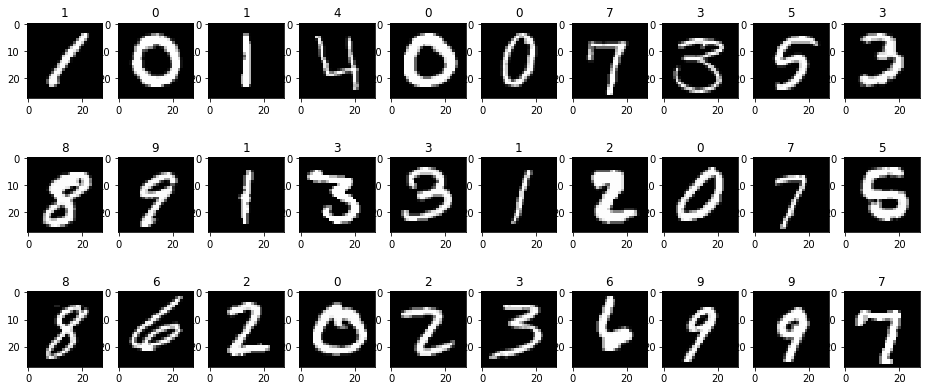

In [5]:
X_train = digit_train.iloc[:,1:].values.astype('float32')
train_features_images=X_train.reshape(X_train.shape[0],28,28)
labels = digit_train["label"].values

def show_images(features_images,labels,start, howmany):
    fig = plt.figure( figsize=(16,7) )
    for i in range(start, start+howmany):
        fig.add_subplot(3,10,i+1, title='Digit: ' )
        plt.imshow(features_images[i], cmap=plt.get_cmap('gray'))
        plt.title(labels[i])
    plt.show()
    
show_images(train_features_images, labels, 0, 30)

### PCA Components

In [6]:
X_train = digit_train.iloc[:,1:]/255.0
y_train = digit_train["label"]

In [7]:
## Set the seed
np.random.seed(1234)

## Generate 30 Principle Components
pca = PCA(n_components = 30)
pca.fit(X_train)
print(pca.explained_variance_)
print('Explained variation per principal component: {0}'.format(pca.explained_variance_ratio_))
print('Explained cumulative variation for 2 principal components: {0}'.format(pca.explained_variance_ratio_.cumsum()))

[5.14849045 3.78139277 3.24569976 2.84085157 2.58469822 2.27256106
 1.73063621 1.52734237 1.46122283 1.24045721 1.10867022 1.08737466
 0.89913185 0.8939741  0.83500525 0.78331047 0.69693749 0.6774182
 0.62737937 0.60877874 0.56623213 0.53613435 0.50957138 0.48207716
 0.46876658 0.44293462 0.42874452 0.41053884 0.39107548 0.3625582 ]
Explained variation per principal component: [0.09748938 0.07160266 0.06145903 0.05379302 0.04894262 0.04303214
 0.03277051 0.02892103 0.02766902 0.02348871 0.02099325 0.02059001
 0.01702553 0.01692787 0.01581126 0.0148324  0.01319688 0.01282727
 0.01187976 0.01152755 0.0107219  0.01015199 0.009649   0.00912838
 0.00887634 0.0083872  0.0081185  0.00777377 0.00740522 0.00686523]
Explained cumulative variation for 2 principal components: [0.09748938 0.16909204 0.23055107 0.28434409 0.33328671 0.37631885
 0.40908936 0.43801039 0.46567942 0.48916813 0.51016138 0.53075139
 0.54777693 0.5647048  0.58051606 0.59534846 0.60854534 0.62137261
 0.63325237 0.64477991 0

In [8]:
pca.components_.shape

(30, 784)

In [9]:
col_names = [ 'pca'+str(i) for i in range(0,30) ]
digit_pca_30 = pd.DataFrame(pca.transform(X_train), columns = col_names)

Y = pd.DataFrame(digit_train.label, columns=["label"])

digit_pca_30 = pd.concat([digit_pca_30, Y], axis=1)

print("The dimensions of PCA projection Data Frame: {0}".format(digit_pca_30.shape))

digit_pca_30.head(10)

The dimensions of PCA projection Data Frame: (42000, 31)


,pca0,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,...,pca21,pca22,pca23,pca24,pca25,pca26,pca27,pca28,pca29,label
0,-2.594493,-2.742397,0.718753,0.472986,-0.317968,1.919458,-2.680278,0.335527,1.366855,0.795995,...,0.870153,0.224194,-0.580225,0.054500,-0.165734,-1.310169,0.822241,0.225089,0.335319,1
1,6.672360,-1.413928,-1.967865,1.315387,-1.734819,2.895702,2.564217,-0.692552,-0.029491,0.266064,...,-1.068296,0.028199,-0.088746,-0.135988,1.038741,-0.300750,0.053192,-0.314869,-0.341610,0
2,-3.478017,-1.152023,0.263354,0.306917,-1.857709,-1.268787,1.716859,-1.197560,-0.765865,-0.100494,...,0.504307,0.595675,0.206184,-0.442348,0.340880,-0.899375,0.422437,-0.046213,0.474225,1
3,-0.650022,1.177187,-0.251551,2.979240,-1.669978,0.617217,-1.192546,1.083957,-0.179872,-1.158735,...,-0.352255,1.147900,0.491309,-0.268313,-0.757788,-0.719733,0.329067,0.853307,0.757527,4
4,7.543960,-1.761385,-2.151424,0.739432,-2.555829,3.882603,2.213753,-1.003589,0.489862,0.696340,...,-0.514525,-0.550718,-0.221411,0.689436,-0.039368,0.197617,-0.637650,-0.283006,0.088145,0
5,1.912753,0.755892,-0.025239,-0.160222,-0.185336,0.276189,-0.657764,1.444145,-2.786721,-0.567567,...,1.154632,-0.556077,0.139472,-0.345500,-0.269544,-1.124624,0.263894,0.264972,0.417156,0
6,-2.636561,1.822761,-1.230039,-0.533846,-1.276645,1.383046,1.307288,0.584538,-0.431400,0.917533,...,-0.333407,0.627351,-0.601286,0.059305,1.111874,0.148807,0.156515,-0.111033,0.279551,7
7,-0.448556,-0.081283,-1.978759,-0.351566,-0.995972,1.278356,-1.414483,0.260226,0.057587,-0.511509,...,-0.731252,0.714503,0.860884,-0.641539,-0.527408,0.514749,1.035774,0.534335,-0.015701,3
8,1.373448,0.552992,-1.525610,-2.428476,1.132512,-1.961401,-2.112628,-0.807693,-1.433356,-0.237235,...,-0.114643,-0.212892,0.426598,-0.581312,-0.909273,-0.217382,0.408026,-0.021289,-0.504746,5
9,1.166243,-3.166322,-0.154403,-0.203789,-0.170159,-0.332956,1.945892,4.458947,-0.035540,-0.737162,...,-0.756667,0.575634,-0.220761,0.322082,-0.789809,-0.097895,0.794779,0.747683,0.829102,3


# K-Means Clustering

In [10]:
from sklearn.cluster import KMeans
from time import time
from sklearn import metrics
from sklearn.cross_validation import train_test_split

/Users/a5sharma/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Divide the dataset into Training and Testing
We will divide the dataset into Training and Testing for our analysis. Once done let us print the dimensions of training set and testing set.

In [11]:
digit_pca_30.head()

,pca0,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,...,pca21,pca22,pca23,pca24,pca25,pca26,pca27,pca28,pca29,label
0,-2.594493,-2.742397,0.718753,0.472986,-0.317968,1.919458,-2.680278,0.335527,1.366855,0.795995,...,0.870153,0.224194,-0.580225,0.054500,-0.165734,-1.310169,0.822241,0.225089,0.335319,1
1,6.672360,-1.413928,-1.967865,1.315387,-1.734819,2.895702,2.564217,-0.692552,-0.029491,0.266064,...,-1.068296,0.028199,-0.088746,-0.135988,1.038741,-0.300750,0.053192,-0.314869,-0.341610,0
2,-3.478017,-1.152023,0.263354,0.306917,-1.857709,-1.268787,1.716859,-1.197560,-0.765865,-0.100494,...,0.504307,0.595675,0.206184,-0.442348,0.340880,-0.899375,0.422437,-0.046213,0.474225,1
3,-0.650022,1.177187,-0.251551,2.979240,-1.669978,0.617217,-1.192546,1.083957,-0.179872,-1.158735,...,-0.352255,1.147900,0.491309,-0.268313,-0.757788,-0.719733,0.329067,0.853307,0.757527,4
4,7.543960,-1.761385,-2.151424,0.739432,-2.555829,3.882603,2.213753,-1.003589,0.489862,0.696340,...,-0.514525,-0.550718,-0.221411,0.689436,-0.039368,0.197617,-0.637650,-0.283006,0.088145,0


In [12]:
# Split the `digits` data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(digit_pca_30.iloc[:,0:31], digit_pca_30.iloc[:,30:31], test_size=0.25, random_state=42)

In [13]:
print('Dimensions of Training Set: {0}'.format(X_train.shape))
print('Dimensions of Training Labels: {0}'.format(len(np.unique(y_train))))

Dimensions of Training Set: (31500, 31)
Dimensions of Training Labels: 10


In [14]:
print('Dimensions of Testing Set: {0}'.format(X_test.shape))
print('Dimensions of Testing Labels: {0}'.format(len(np.unique(y_test))))

Dimensions of Testing Set: (10500, 31)
Dimensions of Testing Labels: 10


In [15]:
## Set the seed
np.random.seed(335454)

K = 10
initializeCluster=[X_train[X_train.label == i].iloc[:,0:30].sample(10).as_matrix() for i in range(10)]

cluster_centers=[X_train[X_train.label == i].iloc[:,0:30].sample(1).as_matrix() for i in range(10)]
cluster_centers = np.reshape(cluster_centers,newshape=(10,30)) 

In [16]:
X_train = X_train.iloc[:,0:30]
X_test = X_test.iloc[:,0:30]

print('Dimensions of Training Set: {0}'.format(X_train.shape))
print('Dimensions of Testing Set: {0}'.format(X_test.shape))

Dimensions of Training Set: (31500, 30)
Dimensions of Testing Set: (10500, 30)


In [17]:
X_train.head()

,pca0,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,...,pca20,pca21,pca22,pca23,pca24,pca25,pca26,pca27,pca28,pca29
31725,-2.191298,1.999593,-0.162162,-1.688859,-0.800790,0.601418,1.873041,1.031043,0.379734,0.479623,...,-1.383594,0.061591,0.015942,-0.427333,-0.547097,0.353096,0.374637,-0.400599,1.022977,0.140332
22274,-1.599117,0.012778,-2.478978,0.164588,1.455540,-0.021564,0.608623,-1.077618,-0.297868,0.286933,...,-1.905335,0.658279,0.356679,0.607450,-0.037354,0.748184,0.616814,0.234545,0.404975,-0.158698
17994,1.320725,-0.399173,-1.827961,0.489141,1.442513,-1.049850,-1.093291,-1.781516,-1.148417,-0.301186,...,-0.853305,1.342696,1.070640,-1.469427,-0.388108,0.175537,-0.197282,0.599459,-0.521234,-0.136873
13484,-1.930826,0.344059,-0.123301,-2.185592,0.850909,-0.565693,1.465010,-1.533226,-0.883546,0.169418,...,-0.859937,-1.532194,-0.314282,-0.321186,0.270863,0.386061,0.896361,0.191306,-0.115150,-0.173331
20668,-1.019706,2.335268,-2.387925,0.927439,2.060721,0.291202,-2.313597,1.950818,1.703094,0.078597,...,0.235173,-1.379113,0.134014,0.426956,0.521930,0.062136,0.736248,-0.267894,1.256336,0.282734


In [69]:
def compute_purity(y_test, y_pred):
    confusion_matrix = metrics.confusion_matrix(y_test, y_pred).T
    clusterSum = 0
    totalSum = confusion_matrix.sum()
    for i in range(0,10):
        clusterSum +=max(confusion_matrix[i])
    return clusterSum/confusion_matrix.sum()

In [70]:
for i in range(K):
    ## Create the KMeans model
    kmeans = KMeans(init=initializeCluster[i], n_clusters=K, n_init=1,n_jobs=-1)

    ## Fit the model to the data
    kmeans.fit(X_train)

    # Predict the labels for `X_test`
    y_pred= kmeans.predict(X_test)
    
    #score = metrics.accuracy_score(y_test, y_pred).round(2)
    score = compute_purity(y_test, y_pred).round(2)

    # Print the accuracy
    print('Model accuracy: {0} and Number of iteration required to converge : {1} if cluster centroid are initialized from digit {2}'.format(
        score,kmeans.n_iter_, i))

Model accuracy: 0.6 and Number of iteration required to converge : 51 if cluster centroid are initialized from digit 0
Model accuracy: 0.58 and Number of iteration required to converge : 50 if cluster centroid are initialized from digit 1
Model accuracy: 0.6 and Number of iteration required to converge : 103 if cluster centroid are initialized from digit 2
Model accuracy: 0.6 and Number of iteration required to converge : 56 if cluster centroid are initialized from digit 3
Model accuracy: 0.58 and Number of iteration required to converge : 96 if cluster centroid are initialized from digit 4
Model accuracy: 0.6 and Number of iteration required to converge : 56 if cluster centroid are initialized from digit 5
Model accuracy: 0.6 and Number of iteration required to converge : 32 if cluster centroid are initialized from digit 6
Model accuracy: 0.55 and Number of iteration required to converge : 58 if cluster centroid are initialized from digit 7
Model accuracy: 0.6 and Number of iteration 

In [71]:
## Create the KMeans model
kmeans = KMeans(init=cluster_centers, n_clusters=K, n_init=1,n_jobs=-1)

## Fit the model to the data
kmeans.fit(X_train)

# Predict the labels for `X_test`
y_pred= kmeans.predict(X_test)

#score = metrics.accuracy_score(y_test, y_pred).round(2)
score = compute_purity(y_test, y_pred).round(2)

# Print the accuracy
print('Model accuracy: {0} and Number of iteration required to converge : {1} if cluster centroid is initialized from all digits.'.format(
    score,kmeans.n_iter_))

Model accuracy: 0.6 and Number of iteration required to converge : 115 if cluster centroid is initialized from all digits.


##### Problem 6  – DIGITS/PCA/CLUSTERING<br>
•	We will use the DIGITS_PCA_30 from above<br>
•	Do K-Means clustering on this data with K = 5, 10, 15, 20, 25<br>
•	Initialize Clusters randomly<br>
•	For each K (x-axis), plot the average purity (y-axis) of all clusters.<br>
•	Do you notice any trends – as K increases what happens to purity?<br>


### Build the Model and Train using 'random'
We will create the model using 'random'

In [72]:
purityMap = {}
for k in range(5, 30, 5):
    ## Create the KMeans model
    kmeans_random = KMeans(init='random', n_clusters=k, n_init=10)

    ## Fit the model to the data
    kmeans_random.fit(X_train)
    
    # Predict the labels for `X_test`
    y_pred= kmeans_random.predict(X_test)
    
    #score = metrics.accuracy_score(y_test, y_pred).round(2)
    score = compute_purity(y_test, y_pred).round(2)
    purityMap[k] = score

    # Print the accuracy
    print('Model accuracy: {0}, Number of iteration required to converge : {1} and number of clusters {2}'.format(
        score,kmeans_random.n_iter_, k))

Model accuracy: 0.46, Number of iteration required to converge : 17 and number of clusters 5
Model accuracy: 0.6, Number of iteration required to converge : 64 and number of clusters 10
Model accuracy: 0.49, Number of iteration required to converge : 63 and number of clusters 15
Model accuracy: 0.36, Number of iteration required to converge : 53 and number of clusters 20
Model accuracy: 0.32, Number of iteration required to converge : 59 and number of clusters 25


In [73]:
purityMap

{5: 0.46, 10: 0.6, 15: 0.49, 20: 0.36, 25: 0.32}

In [74]:
purity = pd.DataFrame(list(purityMap.items()), columns=['K', 'Purity'])
purity.head()

,K,Purity
0,5,0.46
1,10,0.60
2,15,0.49
3,20,0.36
4,25,0.32


Text(0,0.5,'Purity')

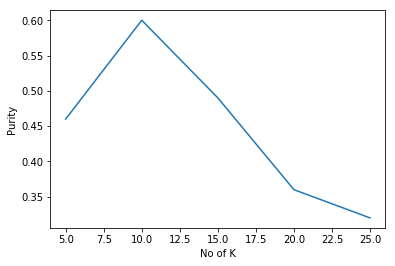

In [75]:
plt.plot(purity['K'],purity['Purity'])
plt.xlabel("No of K")
plt.ylabel("Purity")